
### Context
**Credit Card Fraud Detection with SVM**

This notebook demonstrates a complete machine learning workflow using **support vector machines** model to predict fraud

We follow a standard ML pipeline:

1. **Load & Explore Data** 
2. **Preprocess Data** 
3. **Split Data** 
4. **Train Model** 
5. **Evaluate Model** 
6. **Interpret Results** 


## Installing libs
- Versions in this tutorial:

In [70]:
!pip install numpy==2.2.5
!pip install pandas==2.2.1
!pip install matplotlib==3.10.0
!pip install scikit-learn==1.6.1

  Using cached numpy-2.2.5-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas 2.2.1 requires numpy<2,>=1.26.0; python_version >= "3.12", but you have numpy 2.2.5 which is incompatible.
  Using cached numpy-1.26.4-cp313-cp313-macosx_14_0_arm64.whl
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5


### Importing dependencies

In [71]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore')

### Load & Explore Data
Dataset source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

In [72]:
df = pd.read_csv('creditcard.csv')

In [73]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


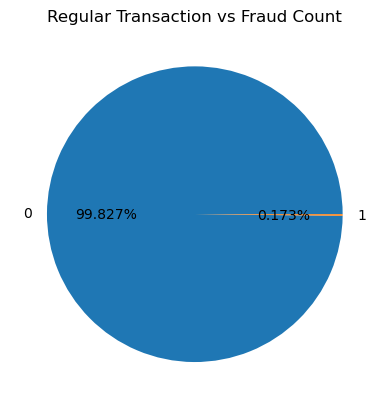

In [74]:
labels = df.Class.unique()
sizes = df.Class.value_counts().values
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Regular Transaction vs Fraud Count')
plt.show()

Note: the credit card fraud detection dataset from Kaggle is highly imbalanced, with fraudulent transactions making up only a tiny fraction of all transactions. One way to handle this scenario is to assign higher weights to the minority class (fraud) so the model learns to prioritize those samples during training.

- Understanding how each feature affects the model

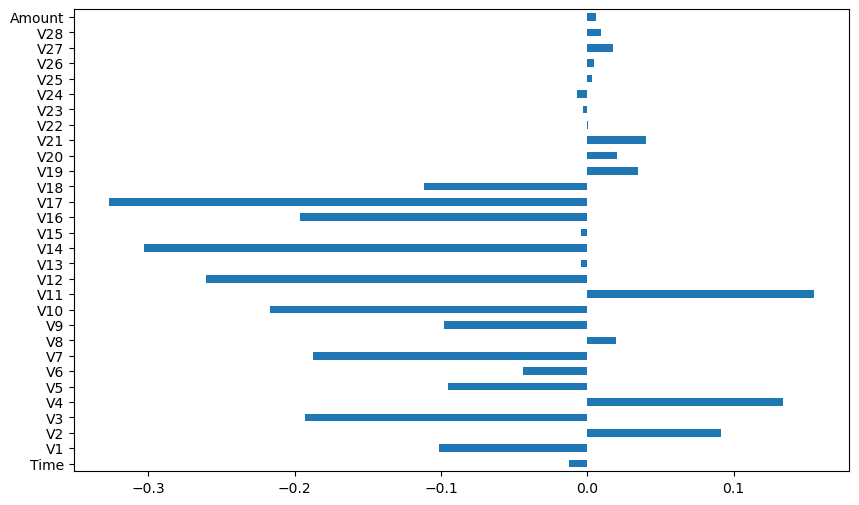

In [75]:
correlation_values = df.corr()['Class'].drop('Class')
correlation_values.plot(kind='barh', figsize=(10, 6))
plt.show()

### Preprocess Data

The features 2 to 30 will be used as input features and feature 31, i.e. Class will be used as the target variable.

Standardize features by removing the mean and scaling to unit variance:

In [76]:
from sklearn.preprocessing import normalize, StandardScaler
df.iloc[:, 1:30] = StandardScaler().fit_transform(df.iloc[:, 1:30])
data_matrix = df.values

X: feature matrix (for this analysis, we exclude the Time variable from the dataset)

In [77]:
X = data_matrix[:, 1:30]

y: target vector

In [78]:
y = data_matrix[:, 30]

The L₁ normalization (also known as Manhattan normalization) scales each data sample so that the sum of the absolute values of its features equals 1.

In [79]:
X = normalize(X, norm="l1")

### Split Data

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Train Model

In [81]:
svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)
svm.fit(X_train, y_train)

LinearSVC(class_weight='balanced', fit_intercept=False, loss='hinge',
          random_state=31)

### Evaluate Model
**ROC-AUC** (Receiver Operating Characteristic - Area Under the Curve) is a performance measurement for classification problems at various threshold settings. ROC-AUC is especially useful for evaluating classifiers on imbalanced datasets because it considers all classification thresholds.


In [82]:
y_pred_svm = svm.decision_function(X_test)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM ROC-AUC score: {0:.2f}%".format(roc_auc_svm*100))

SVM ROC-AUC score: 98.58%


### Interpret Results

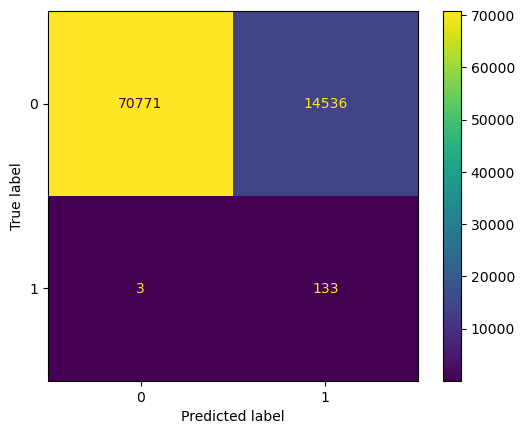

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
